<a href="https://colab.research.google.com/github/eduardodut/Mineracao_dados_textos_web/blob/master/projeto01_equipe01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<b> EQUIPE: </b>
  - Eduardo Façanha
  - Giovanni Brígido
  - Maurício Brito

<b> ATIVIDADE 01 </b> - Pré-processamento dos textos (Prazo: 11/05/2020 - 30%)

- Tokenização
- Lematização
- POS Tagging
- Normalização (hashtags, menções, emojis e símbolos especiais)
- Chunking
- NER (entidades nomeadas)
- Remoção stop-words

<b> ATIVIDADE 02 </b> - Representação Semântica (Prazo: 30/06/2020 - 30%)

- Uso de bases de conhecimento externas
- Identificação de tópicos
- Representação vetorial das palavras e textos

<b> ATIVIDADE 03 </b> - Analise da Linguagem Ofensiva - Subtarefas A e B (Prazo: 30/07/2020 - 40%)

- Resultado da subtarefa A para um conjunto de teste a ser fornecido
- Resultado da subtarefa B para um conjunto de teste a ser fornecido


# Atividade 03

## Bibliotecas utilizadas

Tecnologias utilizadas
figura do scikit learn
spacy
nltk


In [ ]:
import spacy
import pandas as pd
import re
!pip install Transformers
from spacy.lang.en import English
from spacy.lang.en.stop_words import STOP_WORDS
!python -m spacy download en_core_web_sm
!python -m spacy download en_core_web_md
!python -m spacy download en_core_web_lg
import en_core_web_lg
import en_core_web_md
import en_core_web_sm
nlp = spacy.load("en_core_web_sm")
!python -m nltk.downloader wordnet
!python -m nltk.downloader omw
!pip install spacy-wordnet
!pip install empath
from empath import Empath 

## Engenharia de features

### Carregamento do arquivo de dados e transformação em DataFrame

É realizado o download do arquivo e instanciado um DataFrame com os dados. A variável do DataFrame é chamada 'tweets'

#### Dataset_treino

In [ ]:
#download o arquivo localizado no reposítório do projeto
!curl --remote-name \
    -H 'Accept: application/vnd.github.v3.raw' \
    --location https://raw.githubusercontent.com/eduardodut/Mineracao_dados_textos_web/master/datasets/olid-training-v1.0.tsv

#leitura para objeto dataframe
tweets = pd.read_csv('/content/olid-training-v1.0.tsv', sep='\t',encoding= 'utf-8', index_col = 'id')

#verificação e remoção de duplicatas

if tweets.duplicated(['tweet']).sum()>0:
  tweets.drop_duplicates(subset='tweet', keep='first', inplace=True)

print('TWEETS DUPLICADOS: ',tweets.duplicated(['tweet']).sum())


#visualização dos primeiros registros
tweets.head()

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1915k  100 1915k    0     0  7122k      0 --:--:-- --:--:-- --:--:-- 7122k
TWEETS DUPLICADOS:  0


,tweet,subtask_a,subtask_b,subtask_c
id,,,,
86426,@USER She should ask a few native Americans wh...,OFF,UNT,NaN
90194,@USER @USER Go home you’re drunk!!! @USER #MAG...,OFF,TIN,IND
16820,Amazon is investigating Chinese employees who ...,NOT,NaN,NaN
62688,"@USER Someone should'veTaken"" this piece of sh...",OFF,UNT,NaN
43605,@USER @USER Obama wanted liberals &amp; illega...,NOT,NaN,NaN


In [ ]:
#verificação e remoção de duplicatas

if tweets.duplicated(['tweet']).sum()>0:
  tweets.drop_duplicates(subset='tweet', keep='first', inplace=True)

print('TWEETS DUPLICADOS: ',tweets.duplicated(['tweet']).sum())

TWEETS DUPLICADOS:  0


#### testset_a

In [ ]:
#download o arquivo localizado no reposítório do projeto
!curl --remote-name \
    -H 'Accept: application/vnd.github.v3.raw' \
    --location https://raw.githubusercontent.com/eduardodut/Mineracao_dados_textos_web/master/datasets/testset-levela.tsv

#leitura para objeto dataframe
testset_a = pd.read_csv('/content/testset-levela.tsv', sep='\t',encoding= 'utf-8', index_col = 'id')

#conversão da coluna 'id' de inteiro para string
# testset_a['id'] = testset_a['id'].astype('str')
#verificação e remoção de duplicatas
# print(testset_a.duplicated(['tweet']).sum())
# if testset_a.duplicated(['tweet']).sum()>0:
#   testset_a.drop_duplicates(subset='tweet', keep='first', inplace=True)

# print('TWEETS DUPLICADOS: ',testset_a.duplicated(['tweet']).sum())
# testset_a = testset_a[['subtask_c','subtask_b','subtask_a','id','tweet']]
testset_a.head()

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  130k  100  130k    0     0   509k      0 --:--:-- --:--:-- --:--:--  509k


,tweet
id,
15923,#WhoIsQ #WheresTheServer #DumpNike #DECLASFISA...
27014,"#ConstitutionDay is revered by Conservatives, ..."
30530,#FOXNews #NRA #MAGA #POTUS #TRUMP #2ndAmendmen...
13876,#Watching #Boomer getting the news that she is...
60133,#NoPasaran: Unity demo to oppose the far-right...


#### testset_b

In [ ]:
#download o arquivo localizado no reposítório do projeto
!curl --remote-name \
    -H 'Accept: application/vnd.github.v3.raw' \
    --location https://raw.githubusercontent.com/eduardodut/Mineracao_dados_textos_web/master/datasets/testset-levelb.tsv

#leitura para objeto dataframe
testset_b = pd.read_csv('/content/testset-levelb.tsv', sep='\t',encoding= 'utf-8', index_col = 'id')
# print(testset_b.duplicated(['tweet']).sum())
# if testset_b.duplicated(['tweet']).sum()>0:
#   testset_b.drop_duplicates(subset='tweet', keep='first', inplace=True)

# print('TWEETS DUPLICADOS: ',testset_b.duplicated(['tweet']).sum())
testset_b.head()

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 35447  100 35447    0     0   183k      0 --:--:-- --:--:-- --:--:--  183k


,tweet
id,
15923,#WhoIsQ #WheresTheServer #DumpNike #DECLASFISA...
60133,#NoPasaran: Unity demo to oppose the far-right...
83681,. . . What the fuck did he do this time?
65507,@USER Do you get the feeling he is kissing @US...
12588,@USER Nigga ware da hits at


### Funções para extração de features e preprocessamento

#### Funções para criação de features

Criação de features com informações intrínsecas ao corpus

##### Comprimento do tweet % (contagem de caracteres/comprimento máximo de um tweet)

In [ ]:
def get_tweet_length(text):
    return len(text)/240.0
tweets.tweet.apply(get_tweet_length).head()

id
86426    0.295833
90194    0.279167
16820    0.758333
62688    0.270833
43605    0.300000
Name: tweet, dtype: float64

###### Histogramas


In [ ]:
tweets['comprimento_tweet'] = tweets.tweet.apply(get_tweet_length)
tweets.hist(column = 'comprimento_tweet', by= "subtask_a")
tweets.hist(column = 'comprimento_tweet', by= "subtask_b")

##### Contagem de tokens

In [ ]:
def get_word_count(text):
  return len(text.split())

tweets.tweet.apply(get_word_count).head()

id
86426    14
90194    11
16820    27
62688    11
43605    12
Name: tweet, dtype: int64

###### Histogramas


In [ ]:
tweets['contagem_palavras'] = tweets.tweet.apply(get_word_count)
tweets.hist(column = 'contagem_palavras', by= "subtask_a")
tweets.hist(column = 'contagem_palavras', by= "subtask_b")

##### Cálculo do comprimento médio das palavras

In [ ]:
def get_avg_word_len(text):
  words = text.split()
  word_len = 0
  for word in words:
    word_len = word_len + len(word)
  return word_len/len(words)

tweets.tweet.apply(get_avg_word_len).head()

id
86426    4.142857
90194    5.181818
16820    5.777778
62688    5.000000
43605    5.083333
Name: tweet, dtype: float64

###### Histogramas


In [ ]:
tweets['avg_len'] = tweets.tweet.apply(get_avg_word_len)
tweets.hist(column = 'avg_len', by= "subtask_a")
tweets.hist(column = 'avg_len', by= "subtask_b")

##### Contagem de stop words

In [ ]:
def get_stop_words_percent(text):
  return len([t for t in text.split() if t in STOP_WORDS])/len(text.split())


tweets.tweet.apply(get_stop_words_percent).head()

id
86426    0.571429
90194    0.000000
16820    0.296296
62688    0.363636
43605    0.250000
Name: tweet, dtype: float64

###### Histogramas


In [ ]:
tweets['sw_count'] = tweets.tweet.apply(get_stop_words_percent)
tweets.hist(column = 'sw_count', by= "subtask_a")
tweets.hist(column = 'sw_count', by= "subtask_b")

##### Percentual de #hashtags

In [ ]:
def get_hashtag_percent(text):
  return len([t for t in text.split() if t.startswith("#")])/len(text.split())

tweets.tweet.apply(get_hashtag_percent).head()

id
86426    0.000000
90194    0.181818
16820    0.185185
62688    0.000000
43605    0.000000
Name: tweet, dtype: float64

###### Histogramas

In [ ]:
tweets['hashtag_count'] = tweets.tweet.apply(get_hashtag_percent)
tweets[tweets['hashtag_count'] > 0].hist(column = 'hashtag_count', by= "subtask_a")
tweets[tweets['hashtag_count'] > 0].hist(column = 'hashtag_count', by= "subtask_b")

##### Contagem de @menções

In [ ]:
def get_mention_percent(text):
  return len([t for t in text.split() if t.startswith("@")])/len(text.split())

tweets.tweet.apply(get_mention_percent).head()

id
86426    0.071429
90194    0.272727
16820    0.000000
62688    0.090909
43605    0.166667
Name: tweet, dtype: float64

###### Histogramas


In [ ]:
tweets['mention_count'] = tweets.tweet.apply(get_mention_percent)
tweets[tweets['mention_count'] > 0].hist(column = 'mention_count', by= "subtask_a")
tweets[tweets['mention_count'] > 0].hist(column = 'mention_count', by= "subtask_b")

##### Contagem de palavras em MAIÚSCULO

In [ ]:
def get_uppercase_percent(text):
  return len([t for t in text.split() if t.isupper()])/len(text.split())

tweets.tweet.apply(get_uppercase_percent).head()

id
86426    0.071429
90194    0.454545
16820    0.185185
62688    0.090909
43605    0.166667
Name: tweet, dtype: float64

###### Histogramas


In [ ]:
tweets['upper_count'] = tweets.tweet.apply(get_uppercase_percent)
tweets.hist(column = 'upper_count', by= "subtask_a")
tweets.hist(column = 'upper_count', by= "subtask_b")

##### Verificar se o tweet contém URL

In [ ]:
def get_contain_url(text):

  return int('URL' in text )

tweets.tweet.apply(get_contain_url).head()

id
86426    0
90194    1
16820    1
62688    0
43605    0
Name: tweet, dtype: int64

##### Contagem de sentenças

In [ ]:
import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize
def sent_count(text):
  return len(sent_tokenize(text))
tweets.tweet.apply(sent_count).head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


id
86426    1
90194    2
16820    2
62688    2
43605    1
Name: tweet, dtype: int64

###### Histogramas

In [ ]:
tweets['sent_count'] = tweets.tweet.apply(sent_count)
tweets.hist(column = 'sent_count', by= "subtask_a")
tweets.hist(column = 'sent_count', by= "subtask_b")

##### Funções de preprocessamento e Limpeza


In [ ]:
#Tratamento básico
def tratamento_texto(text):
  text = text.lower()
  text = text.strip()
  #remove as menções a usuários de cada text
  #remove as palavras url
  text = re.sub('url$', '', text, flags=re.MULTILINE)
  text = re.sub(r'^n$', 'and', text, flags=re.MULTILINE)
  text = re.sub(r'^u$', 'you', text, flags=re.MULTILINE)
  text = re.sub(r'^r$', 'are', text, flags=re.MULTILINE)
  text = re.sub(r'^sh*t$', 'shit', text, flags=re.MULTILINE)
  text = re.sub(r'&amp;', '', text, flags=re.MULTILINE)
  
  doc = nlp(text)
  tokens = []
  for token in doc:
      if token.lemma_ != "-PRON-" :
        if not token.is_stop:
          if not token.is_punct :
            tokens.append(token.lemma_)
  
  text =  " ".join([token for token in tokens]).strip()  

  
  return text

#### Criação das features intrínsecas e preprocessamento 

In [ ]:
#@title Execução das funções de criação de features { display-mode: "form" }
from sklearn.base import BaseEstimator, TransformerMixin

class Criar_Features(BaseEstimator, TransformerMixin):

    def fit(self, X, y=None):
        

        return self
    def transform(self, X):

        features = pd.DataFrame(X)
        #Comprimento do tweet/240.0
        features['length'] = features['tweet'].apply(get_tweet_length)
        #Hashtag por tweet (%)
        features['hashtag_%'] = features['tweet'].apply(get_hashtag_percent)
        #Menções por tweet (%)
        features['mentions_%'] = features['tweet'].apply(get_mention_percent)
        #Stop words (%)
        features['stop_words_%'] = features['tweet'].apply(get_stop_words_percent)
        #upper case (%)
        features['uppercase_%'] =  features['tweet'].apply(get_uppercase_percent)
        #contagem de sentenças
        features['sent_count'] = features['tweet'].apply(sent_count)
        #contém url
        features['has_url'] = features['tweet'].apply(get_contain_url)
        
        features['tweet'] = features['tweet'].apply(tratamento_texto)
               

        return features

# criar_features = Criar_Features()
# print(criar_features.fit_transform(tweets.tweet))

criar_trainset = True #@param {type:"boolean"}
criar_testset_a = True #@param {type:"boolean"}
criar_testset_b = True #@param {type:"boolean"}

if criar_trainset:
  trainset_aumentado = Criar_Features().fit_transform(tweets)
  trainset_aumentado.to_csv('/content/trainset_aumentado.txt', sep=' ')

if criar_testset_a:
  testset_a_aumentado = Criar_Features().fit_transform(testset_a)
  testset_a_aumentado.to_csv('/content/testset_a_aumentado.txt', sep=' ')


if criar_testset_b:
  testset_b_aumentado = Criar_Features().fit_transform(testset_b) 
  testset_b_aumentado.to_csv('/content/testset_b_aumentado.txt', sep=' ')




In [ ]:
trainset_aumentado.head()

,tweet,subtask_a,subtask_b,subtask_c,length,hashtag_%,mentions_%,stop_words_%,uppercase_%,sent_count,has_url
id,,,,,,,,,,,
86426,@user ask native americans,OFF,UNT,NaN,0.108333,0.0,0.250000,0.0,0.0,1,0
90194,@user @user home drunk @user maga trump2020 👊 ...,OFF,TIN,IND,0.212500,0.0,0.272727,0.0,0.0,1,0
16820,amazon investigate chinese employee sell inter...,NOT,NaN,NaN,0.554167,0.0,0.000000,0.0,0.0,1,0
62688,@user should'vetaken piece shit volcano 😂,OFF,UNT,NaN,0.170833,0.0,0.166667,0.0,0.0,1,0
43605,@user @user obama want liberal illegal red ...,NOT,NaN,NaN,0.208333,0.0,0.250000,0.0,0.0,1,0


#### Features a partir de bases de conhecimento externas

##### Listagem dos tipos de entidades

In [ ]:
def extract_entities(text):
  doc = nlp(text)
  lista_entities = ""
  if len(doc.ents) > 0:
    for token in doc:
      if len(token.ent_type_) > 0:
        lista_entities = lista_entities  + " " + token.ent_type_
  
  return lista_entities




##### Classificar de sentimento positivo ou negativo

In [ ]:
def classificar_positivo_negativo(text):

    doc = nlp(text)

    return doc.cats


##### Vetores GloVe

In [ ]:
def get_embeddings(text):
  
  doc = nlp(text)
  return doc.vector


##### Empath

In [ ]:
from empath import Empath
lexicon = Empath()


#### Criação das features a partir das bases externas

In [ ]:
#@title Pesquisa em bases externas { display-mode: "form" }
criar_trainset = True #@param {type:"boolean"}
criar_testset_a = True #@param {type:"boolean"}
criar_testset_b = True #@param {type:"boolean"}


vetores_trainset = pd.DataFrame()
vetores_testset_a = pd.DataFrame()
vetores_testset_b = pd.DataFrame()
def buscar_vetores(dataset_aumentado):
  
  #Extrai entidades
  entidades = dataset_aumentado['tweet'].apply(extract_entities)
  
  
  
  #classifica como positivo ou negativo
  pos_neg = dataset_aumentado['tweet'].apply(classificar_positivo_negativo).apply(pd.Series)
  #busca vetores glove          
  vetor_glove = dataset_aumentado['tweet'].apply(get_embeddings).apply(pd.Series)
  
  #empath
  emp = dataset_aumentado['tweet'].apply(lexicon.analyze).apply(pd.Series)
  print(emp)
  df = pd.concat([entidades, pos_neg, vetor_glove, emp],axis = 1)
      
  return df

for tamanho in ["pequeno", "medio", "grande"]:
  
  if tamanho == "grande":
    nlp = en_core_web_lg.load()

  if tamanho == "medio":
    nlp = en_core_web_md.load()

  if tamanho == "pequeno":
    nlp = en_core_web_sm.load()

  textcat = nlp.create_pipe("textcat")
  textcat.add_label("POSITIVE")
  textcat.add_label("NEGATIVE")
  
  nlp.add_pipe(textcat, last=True)
  
  nlp.begin_training()

  if criar_trainset:
    vetores_trainset = buscar_vetores(trainset_aumentado)
    vetores_trainset['entities'] = vetores_trainset['tweet']
    vetores_trainset.drop("tweet", inplace= True, axis=1)

    vetores_trainset.to_csv('/content/vetores_trainset_aumentado_'+ tamanho + '.txt', sep=' ')

  if criar_testset_a:
    vetores_testset_a = buscar_vetores(testset_a_aumentado)
    vetores_testset_a['entities'] = vetores_testset_a['tweet']
    vetores_testset_a.drop("tweet", inplace= True, axis=1)
    vetores_testset_a.to_csv('/content/vetores_testset_a_aumentado_'+ tamanho + '.txt', sep=' ')


  if criar_testset_b:
    vetores_testset_b = buscar_vetores(testset_b_aumentado)
    vetores_testset_b['entities'] = vetores_testset_b['tweet']
    vetores_testset_b.drop("tweet", inplace= True, axis=1)
    vetores_testset_b.to_csv('/content/vetores_testset_b_aumentado_'+ tamanho + '.txt', sep=' ')

  nlp.remove_pipe('textcat')

In [ ]:
vetores_testset_a_aumentado_grande.head()

,POSITIVE,NEGATIVE,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,...,strength,technology,breaking,shape_and_size,power,white_collar_job,animal,party,terrorism,smell,disappointment,poor,plant,pain,beauty,timidity,philosophy,negotiate,negative_emotion,cleaning,messaging,competing,law,friends,payment,achievement,alcohol,liquid,feminine,weapon,children,monster,ocean,giving,contentment,writing,rural,positive_emotion,musical,entities
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
15923,0.995029,0.005570,-0.191585,-0.046306,0.161409,0.076512,0.009744,-0.155384,0.020297,-0.031936,0.027255,1.090883,-0.058534,-0.073163,0.137335,0.098073,-0.151118,0.068070,-0.056376,-0.030498,0.112310,0.186221,0.057128,-0.081190,0.137852,-0.049840,0.039185,-0.086562,-0.070903,0.098239,-0.023760,0.200604,0.061349,0.100631,0.078179,-0.045438,0.088721,-0.000801,-0.163650,-0.110346,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ORG GPE NORP PERSON PERSON PERSON
27014,0.509064,0.131664,-0.079798,-0.081745,-0.015741,-0.010352,0.027770,0.021988,0.042276,0.157502,0.131809,1.886706,-0.135542,-0.008212,-0.074740,0.082310,-0.115669,0.154069,-0.145469,0.252092,-0.137063,0.266558,0.161167,-0.129297,0.213116,-0.210784,0.034232,-0.020127,-0.300672,0.088087,0.146497,0.136266,0.096604,0.554111,0.077092,-0.162292,0.132814,0.017613,-0.155986,-0.073968,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,PERSON NORP
30530,0.774465,0.058924,0.035193,0.062931,-0.067490,0.107373,0.146218,-0.167144,0.150658,-0.072166,-0.146755,-0.349239,0.093739,-0.351798,0.020655,0.035068,0.090187,0.149613,-0.166578,-0.524152,0.082028,0.175355,0.019184,0.384594,0.230083,-0.246258,-0.099124,0.106663,0.113336,0.039243,0.197662,-0.029539,0.092307,0.229685,0.231176,0.056841,-0.447688,0.135885,0.285860,0.114074,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ORG ORG ORG PRODUCT PRODUCT ORG ORG ORG ORG ORG
13876,0.899354,0.052284,-0.062807,0.197384,-0.154072,0.029531,0.142492,-0.199123,0.063476,-0.016527,0.192436,1.341525,-0.221205,-0.237401,0.079269,-0.073526,-0.160988,-0.046720,-0.016854,0.202983,0.072408,-0.101646,0.072943,0.012844,0.076777,-0.190078,-0.054338,0.143393,0.027233,-0.004049,0.102748,-0.033239,-0.126029,-0.044787,-0.029465,0.121276,-0.117031,-0.119704,0.121817,0.270194,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,PERSON
60133,0.989788,0.007730,-0.024621,-0.112409,0.078997,0.066770,0.202874,-0.087660,-0.010270,0.069021,-0.045096,1.150540,-0.079274,-0.031881,0.034931,0.077285,0.027456,0.080750,-0.035473,0.470752,-0.090268,0.032652,0.141750,0.033244,0.414056,-0.113171,-0.042909,0.103596,-0.026231,0.084489,0.085333,0.040449,0.052166,0.192204,0.001698,0.147964,0.090845,0.135134,-0.088275,-0.134746,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,GPE


## Treinamento do modelo


### Carregamento dos dados salvos

In [ ]:
#@title Download dos datasets e vetores pré-configurados

!curl --remote-name \
    -H 'Accept: application/vnd.github.v3.raw' \
    --location https://raw.githubusercontent.com/eduardodut/Mineracao_dados_textos_web/master/datasets/datasets_aumentados/trainset_aumentado.txt



!curl --remote-name \
    -H 'Accept: application/vnd.github.v3.raw' \
    --location https://raw.githubusercontent.com/eduardodut/Mineracao_dados_textos_web/master/datasets/datasets_aumentados/testset_a_aumentado.txt




!curl --remote-name \
    -H 'Accept: application/vnd.github.v3.raw' \
    --location https://raw.githubusercontent.com/eduardodut/Mineracao_dados_textos_web/master/datasets/datasets_aumentados/testset_b_aumentado.txt





!curl --remote-name \
    -H 'Accept: application/vnd.github.v3.raw' \
    --location https://raw.githubusercontent.com/eduardodut/Mineracao_dados_textos_web/master/datasets/datasets_aumentados/vetores_trainset_aumentado_grande.txt




!curl --remote-name \
    -H 'Accept: application/vnd.github.v3.raw' \
    --location https://raw.githubusercontent.com/eduardodut/Mineracao_dados_textos_web/master/datasets/datasets_aumentados/vetores_trainset_aumentado_medio.txt




!curl --remote-name \
    -H 'Accept: application/vnd.github.v3.raw' \
    --location https://raw.githubusercontent.com/eduardodut/Mineracao_dados_textos_web/master/datasets/datasets_aumentados/vetores_trainset_aumentado_pequeno.txt






!curl --remote-name \
    -H 'Accept: application/vnd.github.v3.raw' \
    --location https://raw.githubusercontent.com/eduardodut/Mineracao_dados_textos_web/master/datasets/datasets_aumentados/vetores_testset_a_aumentado_grande.txt



!curl --remote-name \
    -H 'Accept: application/vnd.github.v3.raw' \
    --location https://raw.githubusercontent.com/eduardodut/Mineracao_dados_textos_web/master/datasets/datasets_aumentados/vetores_testset_a_aumentado_medio.txt



!curl --remote-name \
    -H 'Accept: application/vnd.github.v3.raw' \
    --location https://raw.githubusercontent.com/eduardodut/Mineracao_dados_textos_web/master/datasets/datasets_aumentados/vetores_testset_a_aumentado_pequeno.txt


!curl --remote-name \
    -H 'Accept: application/vnd.github.v3.raw' \
    --location https://raw.githubusercontent.com/eduardodut/Mineracao_dados_textos_web/master/datasets/datasets_aumentados/vetores_testset_b_aumentado_grande.txt




!curl --remote-name \
    -H 'Accept: application/vnd.github.v3.raw' \
    --location https://raw.githubusercontent.com/eduardodut/Mineracao_dados_textos_web/master/datasets/datasets_aumentados/vetores_testset_b_aumentado_medio.txt



!curl --remote-name \
    -H 'Accept: application/vnd.github.v3.raw' \
    --location https://raw.githubusercontent.com/eduardodut/Mineracao_dados_textos_web/master/datasets/datasets_aumentados/vetores_testset_b_aumentado_pequeno.txt






In [2]:
#@title Leitura dos datasets aumentados e respectivos vetores { display-mode: "form" }
import pandas as pd

from sklearn.feature_extraction.text import TfidfVectorizer


#pasta raiz dos arquivos
pasta_raiz = '/content'
# pasta_raiz = 'C:/Users/Eduar/Documents/GitHub/Mineracao_dados_textos_web/datasets/datasets_aumentados'

trainset_aumentado = pd.read_csv(pasta_raiz+'/trainset_aumentado.txt', sep=' ', index_col='id')

testset_a_aumentado = pd.read_csv(pasta_raiz+'/testset_a_aumentado.txt', sep=' ', index_col='id')

testset_b_aumentado = pd.read_csv(pasta_raiz+'/testset_b_aumentado.txt', sep=' ', index_col='id')




vetores_trainset_aumentado_grande = pd.read_csv(pasta_raiz+'/vetores_trainset_aumentado_grande.txt', sep=' ', index_col = 'id')
vetores_trainset_aumentado_grande.entities.fillna("",inplace=True)

vetores_trainset_aumentado_medio = pd.read_csv(pasta_raiz+'/vetores_trainset_aumentado_medio.txt', sep=' ', index_col = 'id')
vetores_trainset_aumentado_medio.entities.fillna("",inplace=True)

vetores_trainset_aumentado_pequeno = pd.read_csv(pasta_raiz+'/vetores_trainset_aumentado_pequeno.txt', sep=' ', index_col = 'id')
vetores_trainset_aumentado_pequeno.entities.fillna("",inplace=True)

vetores_testset_a_aumentado_grande = pd.read_csv(pasta_raiz+'/vetores_testset_a_aumentado_grande.txt', sep=' ', index_col = 'id')
vetores_testset_a_aumentado_grande.entities.fillna("",inplace=True)

vetores_testset_a_aumentado_medio = pd.read_csv(pasta_raiz+'/vetores_testset_a_aumentado_medio.txt', sep=' ', index_col = 'id')
vetores_testset_a_aumentado_medio.entities.fillna("",inplace=True)

vetores_testset_a_aumentado_pequeno = pd.read_csv(pasta_raiz+'/vetores_testset_a_aumentado_pequeno.txt', sep=' ', index_col = 'id')
vetores_testset_a_aumentado_pequeno.entities.fillna("",inplace=True)

vetores_testset_b_aumentado_grande = pd.read_csv(pasta_raiz+'/vetores_testset_b_aumentado_grande.txt', sep=' ', index_col = 'id')
vetores_testset_b_aumentado_grande.entities.fillna("",inplace=True)

vetores_testset_b_aumentado_medio = pd.read_csv(pasta_raiz+'/vetores_testset_b_aumentado_medio.txt', sep=' ', index_col = 'id')
vetores_testset_b_aumentado_medio.entities.fillna("",inplace=True)

vetores_testset_b_aumentado_pequeno = pd.read_csv(pasta_raiz+'/vetores_testset_b_aumentado_pequeno.txt', sep=' ', index_col = 'id')
vetores_testset_b_aumentado_pequeno.entities.fillna("",inplace=True)

dict_vetores = {'pequeno':[vetores_trainset_aumentado_pequeno, vetores_testset_a_aumentado_pequeno, vetores_testset_b_aumentado_pequeno],
                'medio':[vetores_trainset_aumentado_medio, vetores_testset_a_aumentado_medio, vetores_testset_b_aumentado_medio],
                'grande':[vetores_trainset_aumentado_grande, vetores_testset_a_aumentado_grande, vetores_testset_b_aumentado_grande]
}

VOCABULARIO_TWEETS = TfidfVectorizer().fit(pd.concat([testset_a_aumentado['tweet'], 
                                                      testset_b_aumentado['tweet'], 
                                                      trainset_aumentado['tweet']])).vocabulary_
VOCABULARIO_ENTIDADES = TfidfVectorizer().fit(pd.concat([vetores_testset_a_aumentado_grande['entities'], 
                                                         vetores_testset_b_aumentado_grande['entities'], 
                                                         vetores_trainset_aumentado_grande['entities']])).vocabulary_

### Otimização de hiperparâmetros

#### Pipeline

In [5]:
#@markdown Formato dos dados de entrada
trainset_aumentado.head(3)

,tweet,subtask_a,subtask_b,subtask_c,length,hashtag_%,mentions_%,stop_words_%,uppercase_%,sent_count,has_url
id,,,,,,,,,,,
86426,@user ask native americans,OFF,UNT,NaN,0.108333,0.0,0.250000,0.0,0.0,1,0
90194,@user @user home drunk @user maga trump2020 👊 ...,OFF,TIN,IND,0.212500,0.0,0.272727,0.0,0.0,1,0
16820,amazon investigate chinese employee sell inter...,NOT,NaN,NaN,0.554167,0.0,0.000000,0.0,0.0,1,0


##### Anexação dos dados da base de conhecimento externo

In [22]:
#@markdown - São anexados ao trainset_aumentado os dados pesquisados das bases externas

from sklearn.base import TransformerMixin, BaseEstimator
class Anexar_Bases_Externas(BaseEstimator, TransformerMixin):
    def __init__(self, tamanho = ""):
        self.tamanho = tamanho
        
        
    def fit(self, X, y=None):
        return self
    def transform(self, X):
      
      for vetor in dict_vetores[self.tamanho]:

        

        if X.index.isin(vetor.index).all():
          return X.join(vetor.loc[X.index.values])

#Parâmetros testados:
param_grid_anexar_bases_externas = {'anexar_bases_externas__tamanho': ['pequeno', 'medio', 'grande']}
  
Anexar_Bases_Externas('pequeno').fit_transform(trainset_aumentado).head(2)

,tweet,subtask_a,subtask_b,subtask_c,length,hashtag_%,mentions_%,stop_words_%,uppercase_%,sent_count,has_url,POSITIVE,NEGATIVE,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,...,strength,technology,breaking,shape_and_size,power,white_collar_job,animal,party,terrorism,smell,disappointment,poor,plant,pain,beauty,timidity,philosophy,negotiate,negative_emotion,cleaning,messaging,competing,law,friends,payment,achievement,alcohol,liquid,feminine,weapon,children,monster,ocean,giving,contentment,writing,rural,positive_emotion,musical,entities
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
86426,@user ask native americans,OFF,UNT,NaN,0.108333,0.0,0.250000,0.0,0.0,1,0,0.038587,0.644985,-1.041346,-1.257343,-0.500457,0.408931,1.528452,2.627227,-0.565433,-0.308709,0.589683,-0.658479,2.245854,-1.227979,2.843073,-1.752706,-0.953441,-0.419641,-0.526252,1.516921,1.228042,-1.480825,-0.835894,0.10807,-0.590261,-0.683896,0.489676,-1.127765,0.075757,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NORP
90194,@user @user home drunk @user maga trump2020 👊 ...,OFF,TIN,IND,0.212500,0.0,0.272727,0.0,0.0,1,0,0.122446,0.528339,0.696464,-0.722578,-0.737777,0.867711,1.398233,1.998041,0.266691,0.601211,1.760921,-0.005778,2.159467,-0.673866,-0.066159,-1.201520,-1.598888,-0.620495,-0.061755,1.140358,-1.041767,-0.863361,0.388487,-1.10223,-0.402286,-0.253979,-0.266001,0.045803,0.301236,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DATE ORG


##### Tratamento das colunas

In [23]:
#@markdown - Transformação de features textuais em vetores via Tfidf e redução de dimensionalidade via TruncatedSVD
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import FeatureUnion, Pipeline
from nltk.tokenize import TweetTokenizer
from sklearn.decomposition import TruncatedSVD
#!pip install empath
from empath import Empath 
from scipy.stats import randint
#Pipeline de tratamento de colunas
transformar_colunas = ColumnTransformer([('tweet',    Pipeline([('vetorizar',  TfidfVectorizer(vocabulary= VOCABULARIO_TWEETS, 
                                                                                               tokenizer = TweetTokenizer().tokenize)),
                                                                ('reduzir',    TruncatedSVD())]), 'tweet'),
                                         ('empath',   TruncatedSVD(),          list(Empath().cats.keys())),
                                         ('entities', Pipeline([('vetorizar',  TfidfVectorizer(vocabulary= VOCABULARIO_ENTIDADES)),
                                                                ('reduzir',    TruncatedSVD())]), 'entities')],
                                          remainder=  'passthrough') #colunas remanescentes

#Parâmetros de tratamento testados:

param_grid_transformar_colunas = {'transformar_colunas__tweet__vetorizar__ngram_range': [(1,1),(2,2),(1,2)],
                                  'transformar_colunas__tweet__vetorizar__tokenizer'  : [TweetTokenizer().tokenize],
                                  'transformar_colunas__tweet__vetorizar__use_idf'    : [True,False],
                                  'transformar_colunas__tweet__reduzir__n_components' : randint(10,1000),
                                  
                                  'transformar_colunas__empath__n_components'         : [10,20,50,80],
                                  
                                  'transformar_colunas__entities__vetorizar__use_idf' : [True,False],
                                  'transformar_colunas__entities__reduzir__n_components' : [2,5,10],
                            }



colunas_tratadas = pd.DataFrame(transformar_colunas.fit_transform(Anexar_Bases_Externas('pequeno').fit_transform(trainset_aumentado.drop(trainset_aumentado.loc[:,trainset_aumentado.columns.str.startswith('subtask')], axis=1))))
colunas_tratadas.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110
0,0.021297,0.018525,0.328383,-0.227496,0.041569,0.085055,0.108333,0.0,0.250000,0.0,0.0,1.0,0.0,0.038587,0.644985,-1.041346,-1.257343,-0.500457,0.408931,1.528452,2.627227,-0.565433,-0.308709,0.589683,-0.658479,2.245854,-1.227979,2.843073,-1.752706,-0.953441,-0.419641,-0.526252,1.516921,1.228042,-1.480825,-0.835894,0.108070,-0.590261,-0.683896,0.489676,...,0.013714,1.915758,-0.026623,-0.108559,1.840862,0.753077,0.596307,0.633468,0.802329,-0.620325,-1.157371,-0.202152,-1.665904,-0.488559,-0.325713,0.220623,-0.497717,0.560385,-1.142930,0.045411,0.094072,-0.561355,0.401169,0.100222,0.201138,0.318948,-0.533064,-1.886784,1.250545,1.990115,-0.318942,-0.590662,0.109791,-0.605047,-0.204225,-1.452996,0.377721,1.469993,-0.164934,0.290542
1,0.053254,0.132489,0.573818,-0.642411,0.454750,0.032912,0.212500,0.0,0.272727,0.0,0.0,1.0,0.0,0.122446,0.528339,0.696464,-0.722578,-0.737777,0.867711,1.398233,1.998041,0.266691,0.601211,1.760921,-0.005778,2.159467,-0.673866,-0.066159,-1.201520,-1.598888,-0.620495,-0.061755,1.140358,-1.041767,-0.863361,0.388487,-1.102230,-0.402286,-0.253979,-0.266001,...,0.440465,0.807061,0.833678,-0.318138,0.602203,0.814097,1.572616,-1.401342,1.077444,-0.400720,-0.274382,-0.583266,-0.767601,0.193581,0.492965,-0.717458,0.309168,0.958659,-0.427471,-0.633324,-0.079002,1.305284,0.274873,0.311162,1.892246,-1.055072,-0.233875,-0.246164,1.612857,1.078842,-0.976746,-1.042896,-0.119293,0.282059,0.715001,-0.866100,-0.560081,0.567642,0.426799,-0.281517
2,0.027503,0.060566,2.530298,0.424721,0.374324,0.082631,0.554167,0.0,0.000000,0.0,0.0,1.0,0.0,0.222222,0.721776,-0.615152,-0.853825,-2.274851,1.051427,-0.128762,2.064911,-0.950929,0.541458,1.183291,1.666126,1.882830,-1.186785,1.616406,-1.432544,-0.670968,0.114158,0.121697,1.425728,-0.778844,-1.237028,1.138319,-0.346268,-0.375115,-0.457941,-1.011506,...,1.411310,2.554292,-0.487833,-0.185452,1.637249,-0.446635,0.137360,0.493168,1.539407,-0.156815,1.137135,-2.009736,-0.017837,-0.019673,-0.658917,0.629225,0.237023,-0.335258,-1.475249,-1.144829,1.217227,-0.737502,-0.270369,1.223916,1.014272,-1.666876,-0.755022,-0.627115,1.445332,2.273419,0.189335,-1.557255,-0.763483,1.165960,0.795845,0.092238,0.022737,2.618931,1.011205,0.231510
3,0.015048,0.029617,0.065004,-0.103225,0.994964,-0.077238,0.170833,0.0,0.166667,0.0,0.0,1.0,0.0,0.043773,0.471979,0.394033,-0.402712,-1.691887,1.592296,-0.195483,1.436344,0.832459,1.509919,1.344776,1.392124,1.797900,-1.534125,0.583209,-1.500708,-0.337456,0.463184,-1.148427,-1.226802,0.262132,-0.654197,0.390067,0.794006,0.177037,0.268509,-0.695805,...,2.800806,0.175926,0.337968,0.085569,1.015790,1.052368,1.060033,-1.065626,0.441401,-1.990651,0.839566,-1.337828,-1.679889,0.043738,0.581153,-1.192460,1.246262,0.677392,-0.879031,0.709988,1.009378,1.531737,0.316778,0.677426,1.719754,-0.935622,-0.643598,0.052292,1.293263,0.438658,-1.427367,0.769587,-0.240995,0.393086,1.183709,-1.916518,-0.792273,0.660601,1.087136,-0.100614
4,0.096539,0.163474,0.840979,0.863993,0.994964,-0.077238,0.208333,0.0,0.250000,0.0,0.0,1.0,0.0,0.127577,0.534496,0.514337,-1.533549,-0.858121,0.899231,2.499733,0.871216,0.465504,0.934160,1.231368,-0.047256,2.483899,-0.284461,0.938099,-1.669887,-1.187995,0.173517,-0.623283,1.060048,-0.575847,-1.205700,0.868243,-0.366159,-0.615841,-0.485167,-0.417877,...,1.805321,0.937808,0.131991,-0.024218,2.396851,-0.712626,1.297234,-0.846530,1.546052,-0.524500,0.892556,-0.756907,-1.034634,0.109972,-0.161082,0.914799,0.547630,0.925543,-0.555662,-0.712496,-0.057928,0.841996,0.958830,1.723245,0.651187,-0.253526,-0.884392,-0.533880,0.855391,0.542294,-1.114131,-1.601093,0.265150,-0.044628,0.340354,-0.449549,0.144594,0.876419,-1.168657,0.201855


##### Redução de dimensionalidade

In [43]:
#@markdown - Os parâmetros serão ajustados para otimização do o f1score
from sklearn.decomposition import PCA


#Parâmetros de redução de dimensionalidade testados:
param_grid_reducao_dimensionalidade = {'reducao_dimensionalidade__n_components' : randint(100,1000),
                                       'reducao_dimensionalidade__whiten'      : [True,False],
                                       'reducao_dimensionalidade__svd_solver'   : ['auto']#, 'full', 'arpack', 'randomized']
                                       }



pd.DataFrame(PCA(n_components= 10, svd_solver='full').fit_transform(colunas_tratadas)).head()

,0,1,2,3,4,5,6,7,8,9
0,-0.779791,2.521776,1.864262,-1.715930,-0.177702,-0.955675,-0.585487,3.548339,-1.151386,0.071866
1,0.917848,1.901255,-0.541146,0.945178,-1.959779,1.083181,0.748256,0.507867,-0.004589,-1.049555
2,-5.577137,0.004593,-0.308244,-0.432783,-0.282942,-0.802232,-1.741290,0.263636,0.794017,0.795559
3,1.074052,-1.626715,-0.344200,-0.585298,1.567319,2.366719,1.074241,0.363769,0.648175,-0.647904
4,1.133109,0.343393,0.480210,0.442265,-0.039885,0.403108,-1.158229,1.295166,-0.070961,-1.535424


##### Algoritmos de classificação


In [25]:
#@markdown - Logistic regression
#@markdown - K Neighbors
#@markdown - SVM
#@markdown - SGD classifier
#@markdown - Random Forest
#@markdown - Adaptative boosting
#@markdown - Extra trees
#@markdown - Gradient boosting
#@markdown - Extreme gradient boosting

import xgboost as xgb
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from nltk.tokenize import TweetTokenizer
from scipy.stats import randint

#Dicionário de algoritmos
dict_algoritmos = {'logistic_regression_1': LogisticRegression(),
                   'logistic_regression_2': LogisticRegression(),
                   'knn'                  : KNeighborsClassifier(), 
                   'svc'                  : SVC(),
                   'sgdc'                 : SGDClassifier(),
                   'random_forest'        : RandomForestClassifier(),
                   'ada_boost'            : AdaBoostClassifier(),
                   'extra_trees'          : ExtraTreesClassifier(),
                   'grad_boost'           : GradientBoostingClassifier(), 
                   'xgboost'              : xgb.XGBClassifier()}

#Hiperparâmetros testados
dict_param_grid_algoritmos = {'logistic_regression_1': {'classificador__penalty'        : 'l1', 
                                                       'classificador__C'               : [100, 10, 1.0, 0.1, 0.01], 
                                                       'classificador__fit_intercept'   : [False, True], 
                                                       'classificador__solver'          : ['liblinear', 'saga'],
                                                       'classificador__n_jobs'          : [-1]},
                             'logistic_regression_2': {'classificador__penalty'         : 'l2', 
                                                       'classificador__C'               : [100, 10, 1.0, 0.1, 0.01], 
                                                       'classificador__fit_intercept'   : [False, True], 
                                                       'classificador__solver'          : ['newton-cg', 'lbfgs', 'sag', 'saga'],
                                                       'classificador__n_jobs'          : [-1]},
                             'knn'                  : {}, 
                             'svc'                  : {'classificador__C'               : [1.0, 10.0, 100.0],
                                                       'classificador__gamma'           : ['scale', 'auto'], 
                                                       'classificador__kernel'          : ['linear', 'poly', 'rbf']},
                             'sgdc'                 : {},
                             'random_forest'        : {'classificador__n_estimators'    : randint(100,1000), 
                                                       'classificador__max_depth'       : [None, 2, 3, 4, 5, 7, 10,100,200],
                                                       'classificador__min_samples_leaf': randint(1,4),
                                                       'classificador__bootstrap'       : [True,False],
                                                       'classificador__criterion'       : ['gini', 'entropy']},
                             'ada_boost'            : {},
                             'extra_trees'          : {},
                             'grad_boost'           : {}, 
                             'xgboost'              : {'classificador__learning_rate'   : [0.05, 0.10, 0.15, 0.2, 0.25, 0.3],
                                                       'classificador__max_depth'       : [3,4,5,6,8,10,12,15] ,
                                                       'classificador__min_child_weight': [1,3,5,7],
                                                       'classificador__gamma'           : [0.0,0.1,0.2,0.3,0.4],
                                                       'classificador__colsample_bytree': [0.3, 0.4, 0.5, 0.7]}}


param_grid_linear_svm = {'penalty' : ['l1','l2'] , 'loss' : ['hinge', 'squared_hinge'], 'C' : [0.01, 1, 10, 100], 'random_state' : [0, 42]}

param_grid_nb_multi = {'alpha' : [0.1, 1.0, 2] , 'fit_prior' : [False, True]}

param_grid_nb_gauss = {'var_smoothing' : [0.1, 1.0, 2]}

#### Subtask A

##### Random Forest

###### Segregação de dados de treino e de teste

In [26]:
#@markdown train_test_split
test_size = 0.2 #@param {type:"slider", min:0, max:1, step:0.01}
target = "subtask_a" #@param ["subtask_a", "subtask_b", "subtask_c"]
estratificar_alvo = True #@param {type:"boolean"}
remover_nan = True #@param {type:"boolean"}
from sklearn.preprocessing import LabelBinarizer

from sklearn.model_selection import train_test_split

X = trainset_aumentado.drop(trainset_aumentado.loc[:,trainset_aumentado.columns.str.startswith('subtask')], axis=1)
if remover_nan:
  y = trainset_aumentado[target].dropna()
  X = X[trainset_aumentado[target] == trainset_aumentado[target]]
else:
  y = trainset_aumentado[target].fillna("NOT")
binarizador_label = LabelBinarizer()
y = binarizador_label.fit_transform(y)
stratify = None 
if estratificar_alvo == True:
  stratify = y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state= 42, stratify= stratify)

print("Quantidade de observações de teste: ", pd.Series(binarizador_label.inverse_transform(y_test)).count())
print("Percentual por categoria")
print(pd.Series(binarizador_label.inverse_transform(y_test)).value_counts()*100/pd.Series(binarizador_label.inverse_transform(y_test)).count())
print('-------------')
print("Quantidade de observações de treino: ", pd.Series(binarizador_label.inverse_transform(y_train)).count())
print("Percentual por categoria")
print(pd.Series(binarizador_label.inverse_transform(y_train)).value_counts()*100/pd.Series(binarizador_label.inverse_transform(y_train)).count())


Quantidade de observações de teste:  2642
Percentual por categoria
NOT    66.72975
OFF    33.27025
dtype: float64
-------------
Quantidade de observações de treino:  10565
Percentual por categoria
NOT    66.748699
OFF    33.251301
dtype: float64


###### Otimização de hiperparâmetros


In [46]:
#@markdown RandomSearchCV
algoritmo = "random_forest" #@param ['logistic_regression_1', 'logistic_regression_2', 'knn', 'svc', 'sgdc', 'random_forest', 'ada_boost', 'extra_trees', 'grad_boost', 'xgboost']
num_folds = 5 #@param {type:"integer"}

# busca_randomizada = True #@param {type:"boolean"}
num_inter =  1#@param {type:"integer"}
usar_todo_dataset = False #@param {type:"boolean"}
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import RandomizedSearchCV 
from sklearn.metrics import f1_score
from sklearn.decomposition import PCA
from sklearn.model_selection import RepeatedStratifiedKFold
import pickle


param_grid = {**param_grid_anexar_bases_externas, 
              **param_grid_transformar_colunas, 
              **param_grid_reducao_dimensionalidade, 
              **dict_param_grid_algoritmos[algoritmo]}


canal_dados = Pipeline([("anexar_bases_externas",
                              Anexar_Bases_Externas()),
                        ('transformar_colunas',
                              transformar_colunas),
                        ('reducao_dimensionalidade',  
                              PCA()), 
                        ('classificador', 
                              dict_algoritmos[algoritmo])
    ])
cv = RepeatedStratifiedKFold(n_splits= num_folds, n_repeats=1)
args_random_search = {'estimator'          : canal_dados, 
                      'cv'                 : cv, 
                      'scoring'            :'f1_macro', 
                      'n_jobs'             : -1,
                      'verbose'            : 10,
                      'n_iter'             : num_inter,
                      'param_distributions': param_grid,
                      'random_state'       : 42 }

random_search = RandomizedSearchCV(**args_random_search) 

if usar_todo_dataset:
  random_search.fit(X, y)
else:
  random_search.fit(X_train,y_train)


#salvar modelo
import os, joblib

nome_modelo = algoritmo +'_' + target  +"_"+str(num_folds)+"_folds"
modelo_otimizado = random_search.best_estimator_
joblib.dump(modelo_otimizado, nome_modelo+'.pkl')
from google.colab import files
if 'COLAB_GPU' in os.environ:
  files.download(nome_modelo+'.pkl')

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:  2.6min remaining:  1.7min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  3.6min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  3.6min finished
/usr/local/lib/python3.6/dist-packages/sklearn/pipeline.py:354: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [45]:
import joblib
joblib.dump(modelo_otimizado, nome_modelo+'.pkl')
import os
from google.colab import files
if 'COLAB_GPU' in os.environ:
  files.download(nome_modelo+'.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [34]:
nome_modelo

'random_forest_subtask_a_5_folds'

##### Cross Validation e avaliação do modelo

##### Avaliação do modelo

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import recall_score
scoring = {'prec_macro': 'precision_macro',
            'rec_macro': make_scorer(recall_score, average='macro')}

scores = cross_validate(random_search, X, y, 
                        scoring= scoring,
                        cv= RepeatedStratifiedKFold(n_splits= 5),
                        return_train_score= True)

In [ ]:

melhor_modelo = random_search.best_estimator_
melhor_modelo.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/pipeline.py:354: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)


Pipeline(memory=None,
         steps=[('anexar_bases_externas',
                 Anexar_Bases_Externas(tamanho='grande')),
                ('transformar_colunas',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('tweet',
                                                  Pipeline(memory=None,
                                                           steps=[('vetorizar',
                                                                   TfidfVectorizer(analyzer='word',
                                                                                   binary=False,
                                                                                   decode_error='strict',
                                                                                   dt...
                 RandomForestClassifier(boo

In [ ]:
y_pred = melhor_modelo.predict(X_test)
print("F1 Score")
print(f1_score(y_test,y_pred, average='macro'))

NameError: ignored

In [ ]:
pd.Series(y_pred).value_counts()

0    2450
1     192
dtype: int64

In [ ]:
t = random_search.predict(testset_a_aumentado)
pd.Series(t).value_counts()

NameError: ignored

Melhores parâmetros: {'anexar_bases_externas__tamanho': 'grande', 'classificador__bootstrap': False, 'classificador__criterion': 'gini', 'classificador__max_depth': 100, 'classificador__min_samples_leaf': 1, 'classificador__n_estimators': 120, 'reducao_dimensionalidade__n_components': 'mle', 'reducao_dimensionalidade__svd_solver': 'full', 'transformar_colunas__empath__n_components': 50, 'transformar_colunas__entities__vetorizar__use_idf': False, 'transformar_colunas__tweet__reduzir__n_components': 476, 'transformar_colunas__tweet__vetorizar__ngram_range': (1, 2), 'transformar_colunas__tweet__vetorizar__tokenizer': <bound method TweetTokenizer.tokenize of <nltk.tokenize.casual.TweetTokenizer object at 0x7f85f2761e80>>, 'transformar_colunas__tweet__vetorizar__use_idf': True}
melhor score 0.5056728005990032


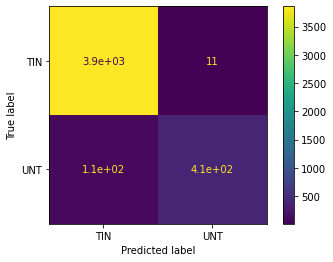

In [ ]:
from sklearn.metrics import plot_confusion_matrix

from sklearn.metrics import classification_report

print("Melhores parâmetros: {}".format(random_search.best_params_)) 
print("melhor score {}".format(random_search.best_score_))
# print(rand_forest_cv.score(X_test, y_test))
plot_confusion_matrix(random_search, X, y, display_labels= binarizador_label.classes_)

## Resultados

In [ ]:
y_pred

## rascunhos

In [ ]:
for sent in tweets['tokens_sem_stopwords'][0]:
  for palavra in sent:
    print(palavra)
    if len(wn.synsets(palavra))>0:
      print(wn.synsets(palavra)[0].hypernyms()[0].name())
    

def busca_hiperonimos(lista_sentencas_tokenizadas):
  dicionario_sinonimos = dict()
  dicionario_antonimos = dict()

  for sent in lista_sentencas_tokenizadas:
    for palavra in sent:
      sinonimos = []
      antonimos = []
      for syn  in wn.synsets(palavra):
        for l in syn.lemmas():
          if l.name() not in sinonimos:
            sinonimos.append(l.name()) 
          if l.antonyms():
              antonimos.append(l.antonyms()[0].name())
      if len(sinonimos) > 0:
        dicionario_sinonimos[palavra] = sinonimos
      if len(antonimos) > 0:
        dicionario_antonimos[palavra] = antonimos
    
  return dicionario_sinonimos, dicionario_antonimos



@user
ask
communicate.v.02
native
person.n.01
americans
inhabitant.n.01
take
income.n.01


In [ ]:

import unicodedata
from sklearn.base import BaseEstimator, TransformerMixin

class TextNormalizer(BaseEstimator, TransformerMixin):
  def __init__(self, language='english'):
    self.stopwords = set(nltk.corpus.stopwords.words(language))
    self.lemmatizer = WordNetLemmatizer()
  
  def is_punct(self, token):
    return all(
    unicodedata.category(char).startswith('P') for char in token)
  def is_stopword(self, token):
    return token.lower() in self.stopwords

  def normalize(self, document):

    return [
    self.lemmatize(token, tag).lower()
    for paragraph in document
    for sentence in paragraph
    for (token, tag) in sentence
    if not self.is_punct(token) and not self.is_stopword(token)
    ]


def lemmatize(self, token, pos_tag):
  tag = {
  'N': wn.NOUN,
  'V': wn.VERB,
  'R': wn.ADV,
  'J': wn.ADJ
  }.get(pos_tag[0], wn.NOUN)
  return self.lemmatizer.lemmatize(token, tag)

def fit(self, X, y=None):
  return self
def transform(self, documents):
  for document in documents:
    yield self.normalize(document)
